# PyCUBs tutorial

Welcome to the PyCUBs tutorial.

PyCUBs is an integrated package for codon usage bias analysis.

It provides not only the calculation of several popular codon bias indices, 
but also several conventional codon usage bias analysis methods, such as 
neutrality plot analysis, ENC-GC3s plot analysis, parity rule 2-bias plot analysis,
optimal codon analysis, correspondence analysis, principal component analysis, 
and phylogenetic analysis. It provides an interactive analysis method for 
freely exploring codon bias and visualizing these results.

We will quickly get started through several cases below.

# Install

```
pip install git+https://github.com/thecgs/pyCUBs.git
```

In [1]:
import pycubs

print(pycubs.CodonTables()) # Pycubs supports all codon tables from NCBI.
print(pycubs.__author__, '\n')
print("Function:", pycubs.__all__, '\n')
print("Version:", pycubs.__version__)

Reference website: https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=tgencodes

Translate Tables/Genetic Codes:
 1: Standard
 2: Vertebrate Mitochondrial
 3: YeastMitochondrial
 4: Mold Mitochondrial, Protozoan Mitochondrial, Coelenterate Mitochondrial, Mycoplasma, Spiroplasma
 5: Invertebrate Mitochondrial
 6: Ciliate Nuclear, Dasycladacean Nuclear, Hexamita Nuclear
 9: Echinoderm Mitochondrial, Flatworm Mitochondrial
10: Euplotid Nuclear
11: Bacterial, Archaeal, Plant Plastid
12: Alternative Yeast Nuclear
13: Ascidian Mitochondrial
14: Alternative Flatworm Mitochondrial
16: Chlorophycean Mitochondrial
21: Trematode Mitochondrial
22: Scenedesmus obliquus Mitochondrial
23: Thraustochytrium Mitochondrial
24: Rhabdopleuridae Mitochondrial
25: Candidate Division SR1, Gracilibacteria
26: Pachysolen tannophilus Nuclear
27: Karyorelict Nuclear
28: Condylostoma Nuclear
29: Mesodinium Nuclear
30: Peritrich Nuclear
31: Blastocrithidia Nuclear
33: Cephalodiscidae Mitochon

In [49]:
# The test data includes all CDS sequences of 18 species of grouper mitochondria.
# It includes three genera: Cephalopholis, Hyporthodus, and Plectropomus.

import os

os.chdir("./example")

data = [("C. argus", "Cephalopholis_argus.cds.fasta"),
        ("C. boenak", "Cephalopholis_boenak.cds.fasta"),
        ("C. cruentata", "Cephalopholis_cruentata.cds.fasta"),
        ("C. fulva", "Cephalopholis_fulva.cds.fasta"),
        ("C. leopardus", "Cephalopholis_leopardus.cds.fasta"),
        ("C. miniata", "Cephalopholis_miniata.cds.fasta"),
        ("C. panamensis", "Cephalopholis_panamensis.cds.fasta"),
        ("C. sexmaculata", "Cephalopholis_sexmaculata.cds.fasta"),
        ("C. sonnerati", "Cephalopholis_sonnerati.cds.fasta"),
        ("C. spiloparaea", "Cephalopholis_spiloparaea.cds.fasta"),
        ("C. urodeta", "Cephalopholis_urodeta.cds.fasta"),
        ("H. haifensis", "Hyporthodus_haifensis.cds.fasta"),
        ("H. niveatus", "Hyporthodus_niveatus.cds.fasta"),
        ("H. octofasciatus", "Hyporthodus_octofasciatus.cds.fasta"),
        ("H. septemfasciatus", "Hyporthodus_septemfasciatus.cds.fasta"),
        ("P. areolatus", "Plectropomus_areolatus.cds.fasta"),
        ("P. laevis", "Plectropomus_laevis.cds.fasta"),
        ("P. leopardus", "Plectropomus_leopardus.cds.fasta")
       ]

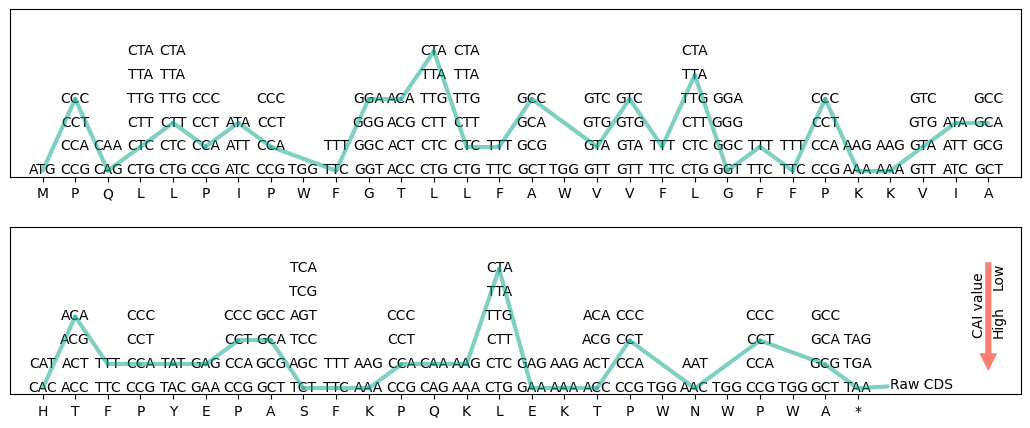

In [50]:
# Example 1: Codon optimization.

# This ATPase6 gene sequence from Cephalopholis argus mitochondria.
sequence = "ATGCCCCAGCTCCTTCCAATACCATGATTCGGAACACTACTCTTTGCCTGAGTAGTCTTTTTAGGTTTTTTCCCCAAAAAAGTAATAGCACACACATTTCCATATGAGCCTGCATCTTTCAAACCACAAAAGCTAGAAAAAACCCCTTGAAACTGACCTTGAGCGTAA"

#url = 'https://github.com/dyyvgug/CUBE/blob/master/resource/RSCU/Vibrio_harveyi'
url = "Escherichia_coli.from.CUBE.txt" # from https://www.codonbias.cn/download or https://github.com/dyyvgug/CUBE/blob/master/resource/RSCU/
ref_Obs = pycubs.get_Obs_from_CUBE_file(file=url, aaseq3=False)
pycubs.draw_codon_optimization_plot(sequence, ref_Obs, genetic_code=4, width=30)

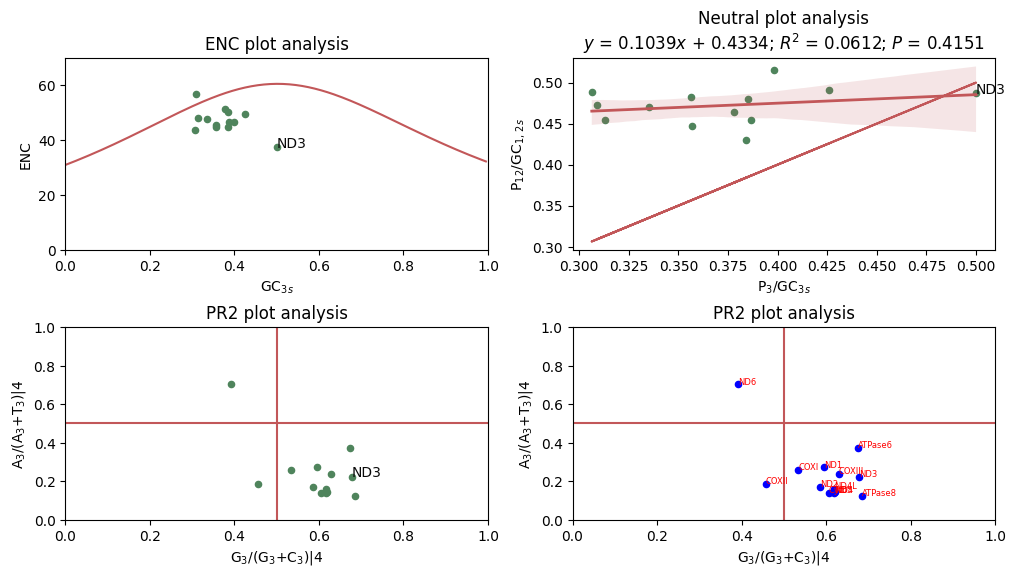

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(12,6))
plt.subplots_adjust(hspace=0.4)

# Example 2: Effective number of codons analysis
ENC = pycubs.ENC_Analysis(file=data[0][1], genetic_code=2)
ENC.draw_ENC_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[0][0])

# Example 3: Parity rule 2 (PR2) analysis.
NPA = pycubs.NPA_Analysis(file=data[0][1], genetic_code=2)
NPA.draw_NPA_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[0][1])

# Example 4: Neutral plot analysis.
PR2 = pycubs.PR2_Analysis(file=data[0][1], genetic_code=2)
PR2.draw_PR2_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[1][0]) # show ND3 gene name
PR2.draw_PR2_plot(show_gene_names=True,
                  figsize=(6,4),
                  ax=axs[1][1], 
                  point_color='blue',
                  point_size=20, 
                  gene_names_color='red',
                  gene_names_size=6) # show all genes name, change point color and size, and change gene names color and size. 

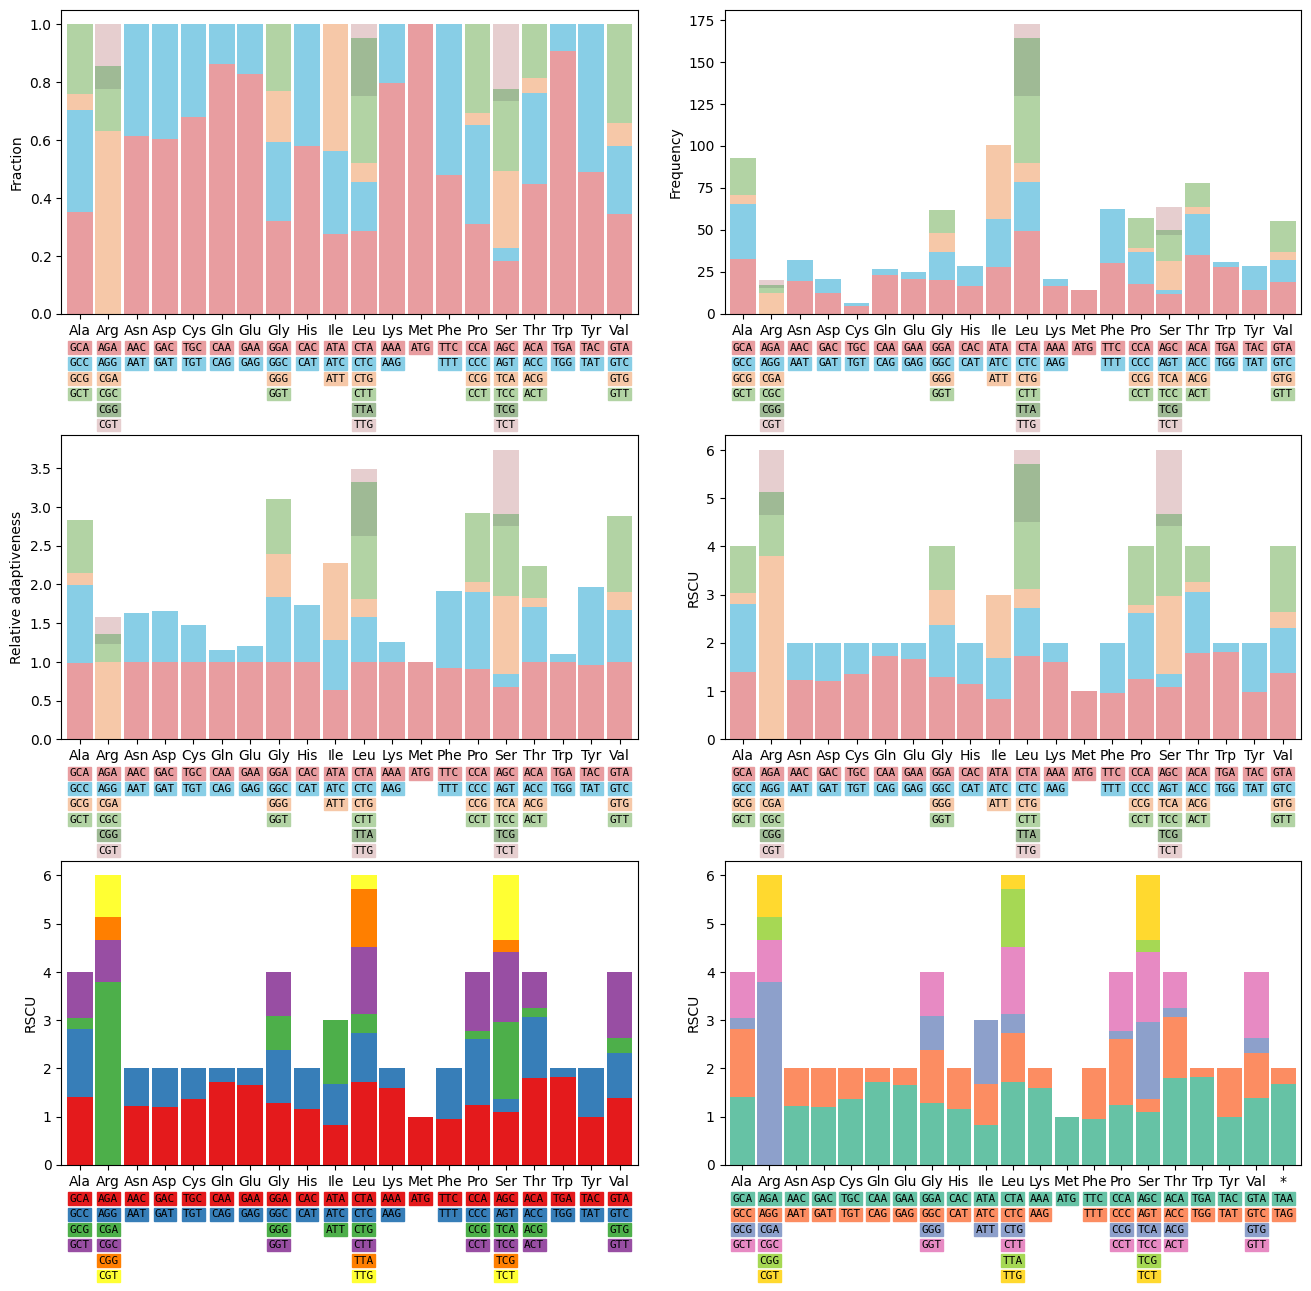

In [52]:
# Example 5: Calculate Obs, Franction, Frequency, RSCU and visualization

# Calculate
Obs=pycubs.get_Obs(seqences=data[0][1], genetic_code=4) #The seqences parameter can be a string of gene sequence or a list. For example, a list of all CDS sequences of a chloroplast, so as to calculate the Obs in the whole organism
Fraction=pycubs.get_Fraction(Obs)
Frequency=pycubs.get_Frequency(Obs)
Relative_Adaptiveness=pycubs.get_Relative_Adaptiveness(Obs)
RSCU=pycubs.get_RSCU(Obs)

# Visualization
fig, axs = plt.subplots(3, 2, figsize=(16,15))
plt.subplots_adjust(wspace=0.15, hspace=0.4)
Fraction.draw_barplot(ax=axs[0][0])
Frequency.draw_barplot(ax=axs[0][1])
Relative_Adaptiveness.draw_barplot(ax=axs[1][0])
RSCU.draw_barplot(ax=axs[1][1])
RSCU.draw_barplot(ax=axs[2][0], palette="Set1") # Change the color scheme.
pycubs.draw_codon_barplot(RSCU,
                          ax=axs[2][1],
                          palette="Set2",
                          remove_stop_codon=False) # You can also use draw_codon_barplot() functions, rather than class methods, to draw graphs, and show stop condon.

In [53]:
# Example 6: This demo gets the same results as CUSP (https://www.bioinformatics.nl/cgi-bin/emboss/cusp).

GeneName, Seqence = next(pycubs.fastaIO(data[0][1]))
print("Input seqence: \n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubs.get_Obs(seqences=Seqence, genetic_code=4)
print("Cusp result: \n")
print(pycubs.get_cusp_like(Obs, human_format=True)) # human_format=True, Human-readable output, otherwise machine-readable.

Input seqence: 

>ND1
ATGATCTCAACGCTTTTTACACATATTATCAACCCCTTAGCCTACATTGTGCCCGTACTACTAGCAGTCGCCTTCCTTACACTAGTTGAACGTAAAGTCTTAGGTTATATACAATTTCGAAAGGGTCCCAACATTGTTGGACCTTATGGGCTGCTACAGCCAATTGCAGACGGTGTTAAACTATTTACTAAGGAACCAGTCCGTCCTTCTACCGCTTCCCCTATTCTTTTCCTGCTGGCCCCCATGCTTGCCCTTACCCTTGCCCTCGCCCTATGGGCCCCCCTTCCCATGCCTTACCCGATCCTAGACCTAAACCTAGGCATCCTCTTTATTCTAGCCCTTTCTAGCCTAGCAGTATACTCCATTTTAGGCTCAGGTTGAGCATCAAATTCAAAATATGCCCTGATCGGAGCCTTGCGAGCCGTAGCACAAACCATTTCATATGAAGTTAGTCTTGGATTAATCTTGCTAAATGCCATTATTTTCACTGGGGGCTTTACACTTCACACCTTCAATATCGCCCAAGAAACCATCTGATTACTACTACCGGCCTGACCTCTCGCTGCAATGTGATACATTTCTACCCTAGCAGAGACTAACCGAGCACCTTTTGACCTAACAGAAGGTGAATCGGAACTGGTATCAGGCTTCAACGTCGAATACGCAGGGGGGCCTTTCGCCCTGTTTTTCCTAGCAGAATACGCGAACATCCTCCTCATAAATACACTTTCTGCCACCCTATTCCTAGGAGCCTCCCACATTCCTGTCATGCCTGAGTTTACAGCTGCTAACCTAATAACAAAAGCAGCCCTCCTATCTATTCTGTTCTTGTGAGTCCGAGCCTCCTACCCACGATTTCGCTACGACCAACTAATACATCTAATCTGAAAAAACTTCCTTCCACTTACACTAGCCCTGGTTATCTGACATTTGGCGCTGCCCATTGCATTCGCTGGACTACCGCCCCAAATGTAA




In [54]:
# Example 7: This demo gets the same results as codonW software.

# help(pycubs.get_codonW_like)
codonW_result_df = pycubs.get_codonW_like(file=data[0][1], genetic_code=4, 
                                          cai_ref_Obs="Escherichia coli", optimal_codons="Escherichia coli")
codonW_result_df

,T3s,C3s,A3s,G3s,CAI,CBI,Fop,Nc,GC3s,GC,L_sym,L_aa,Gravy,Aromo
title,,,,,,,,,,,,,,
ND1,0.2867,0.3531,0.3925,0.1314,0.151,-0.017,0.371,48.70,0.415,0.468,318,324,0.864198,0.123457
ND2,0.2748,0.3477,0.4267,0.0842,0.117,-0.121,0.308,51.20,0.374,0.448,342,348,0.800000,0.080460
COXI,0.3750,0.2909,0.4236,0.0875,0.185,-0.012,0.393,47.16,0.325,0.424,508,516,0.845736,0.149225
COXII,0.4051,0.2974,0.4438,0.0662,0.195,0.046,0.421,46.70,0.301,0.407,226,230,0.432609,0.095652
ATPase8,0.2750,0.3000,0.6136,0.0952,0.125,-0.140,0.306,57.29,0.296,0.411,54,55,0.163636,0.236364
ATPase6,0.2644,0.2788,0.4789,0.1227,0.122,-0.077,0.317,44.26,0.348,0.417,224,227,1.141410,0.088106
COXIII,0.3097,0.3407,0.4949,0.0787,0.160,-0.076,0.368,45.55,0.351,0.441,259,261,0.545211,0.187739
ND3,0.1980,0.4554,0.3918,0.1294,0.118,-0.019,0.355,38.03,0.496,0.491,115,116,1.094828,0.129310
ND4L,0.3000,0.3444,0.4103,0.0833,0.131,-0.108,0.326,45.86,0.385,0.471,96,98,1.098980,0.081633


Get a unroot tree in Newick format. 

 ((((ND1:1.9726657869304307,(ATPase6:2.3089712551550186,ND3:4.448517512412084):0.3349903494833829):0.20863616717469613,ND5:1.9052402325395765):0.06169825516401424,(((COXI:1.8231363013750375,ND4L:4.25454913137166):0.09993712710216723,(ATPase8:5.447270289141767,ND6:4.197436393944238):0.6997053444278429):0.682099887624198,COXII:2.226595720044102):0.2771619979821653):0.14587497153052964,(ND2:2.2938025394643873,(ND4:1.5514999411682888,Cytb:1.5575088167670645):0.23700729372337892):0.053003720126357345,COXIII:2.8547803897844846);


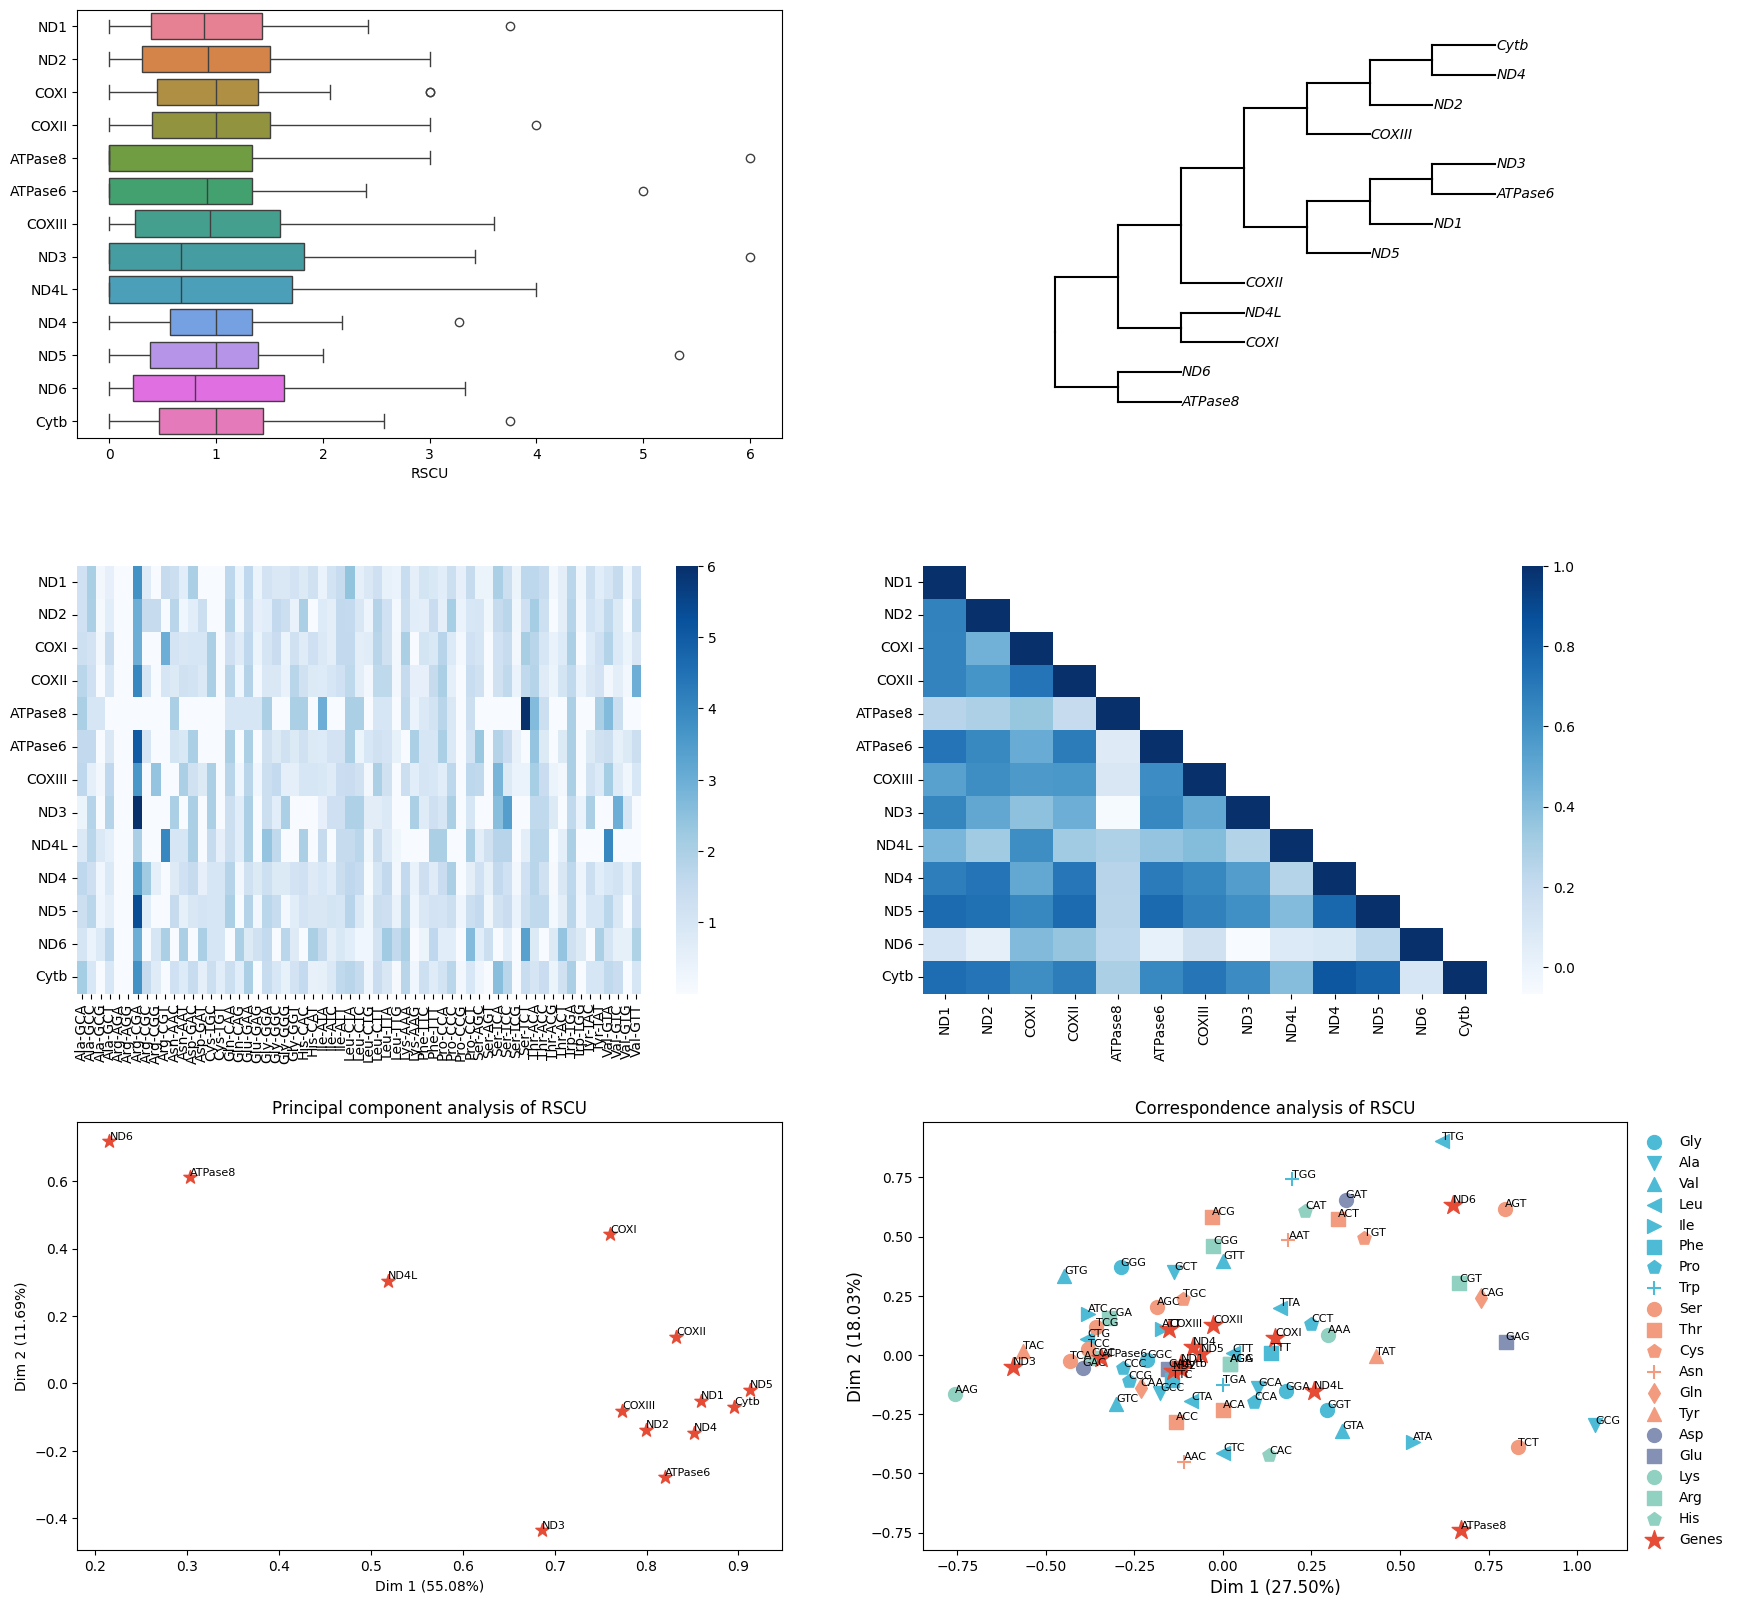

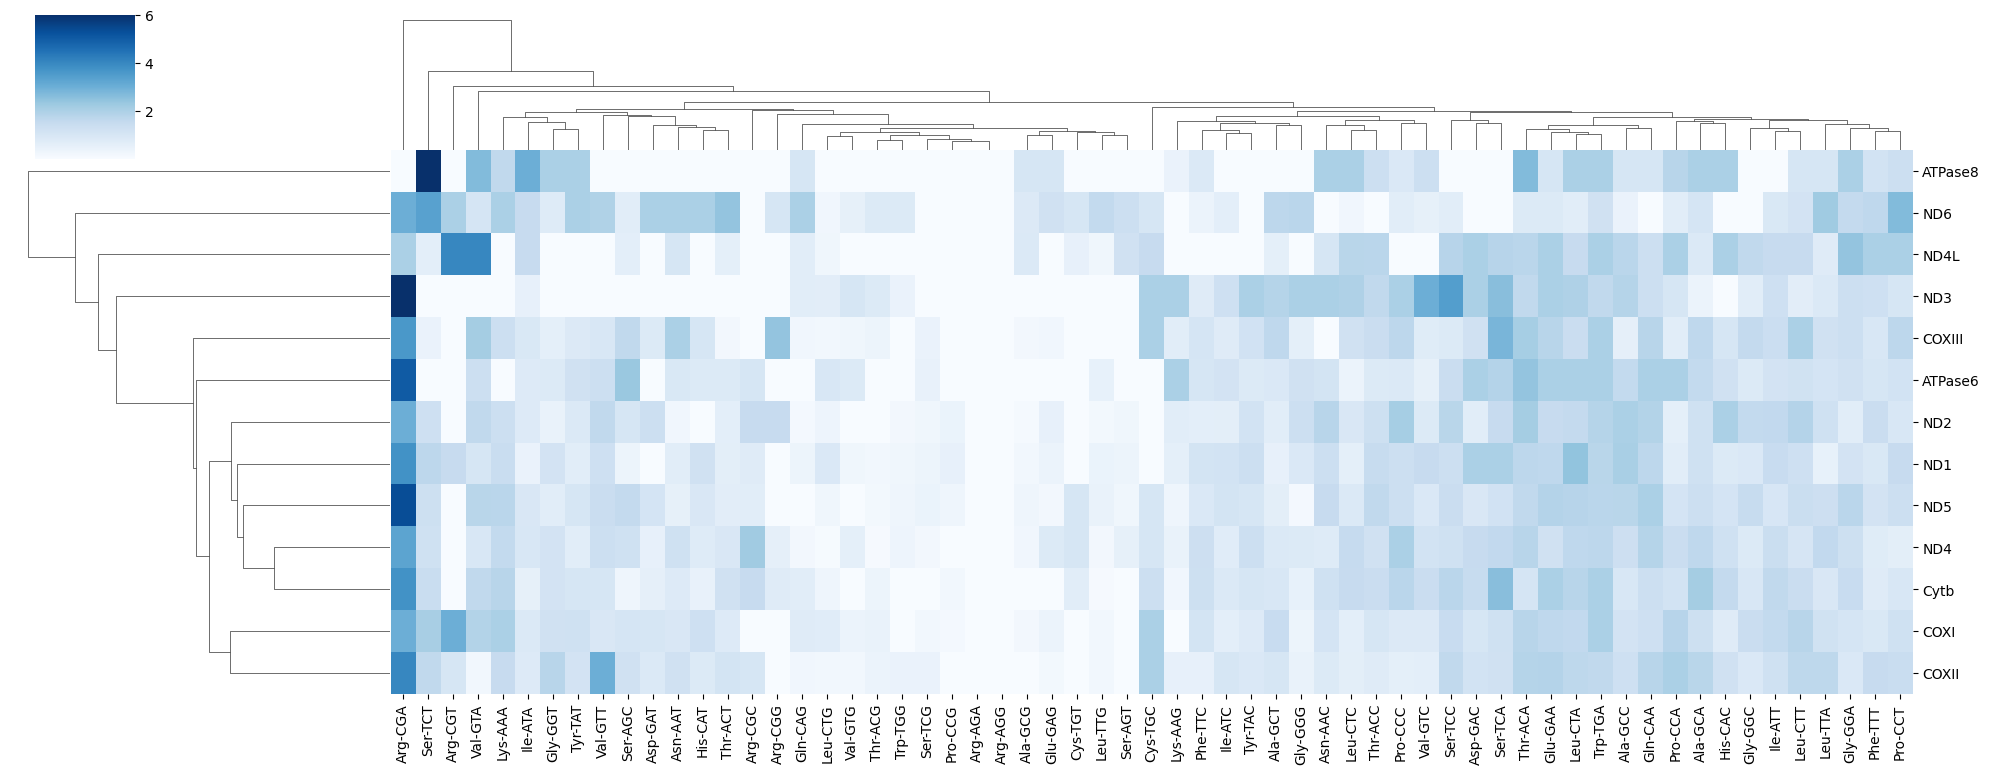

In [55]:
# Example 8: Analysis of RSCU of each gene in a single species.

RSCU_Single_Species = pycubs.RSCU_Single_Species_Analysis(file=data[0][1], genetic_code=4)

fig, axs = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)

RSCU_Single_Species.draw_boxplot(ax=axs[0][0])
RSCU_Single_Species.draw_tree_plot(ax=axs[0][1], tree_method='nj') # Draw a genes tree based on RSCU and use the NJ method.
print('Get a unroot tree in Newick format. \n\n', 
      RSCU_Single_Species.get_tree_newick_string(tree_method='nj', outgroup=None))
RSCU_Single_Species.draw_heatmap(ax=axs[1][0])
RSCU_Single_Species.draw_pearson_heatmap(ax=axs[1][1])
RSCU_Single_Species.draw_PCA_plot(ax=axs[2][0])
RSCU_Single_Species.draw_COA_plot(ax=axs[2][1])

RSCU_Single_Species.draw_clustermap(figsize=(20, 8))

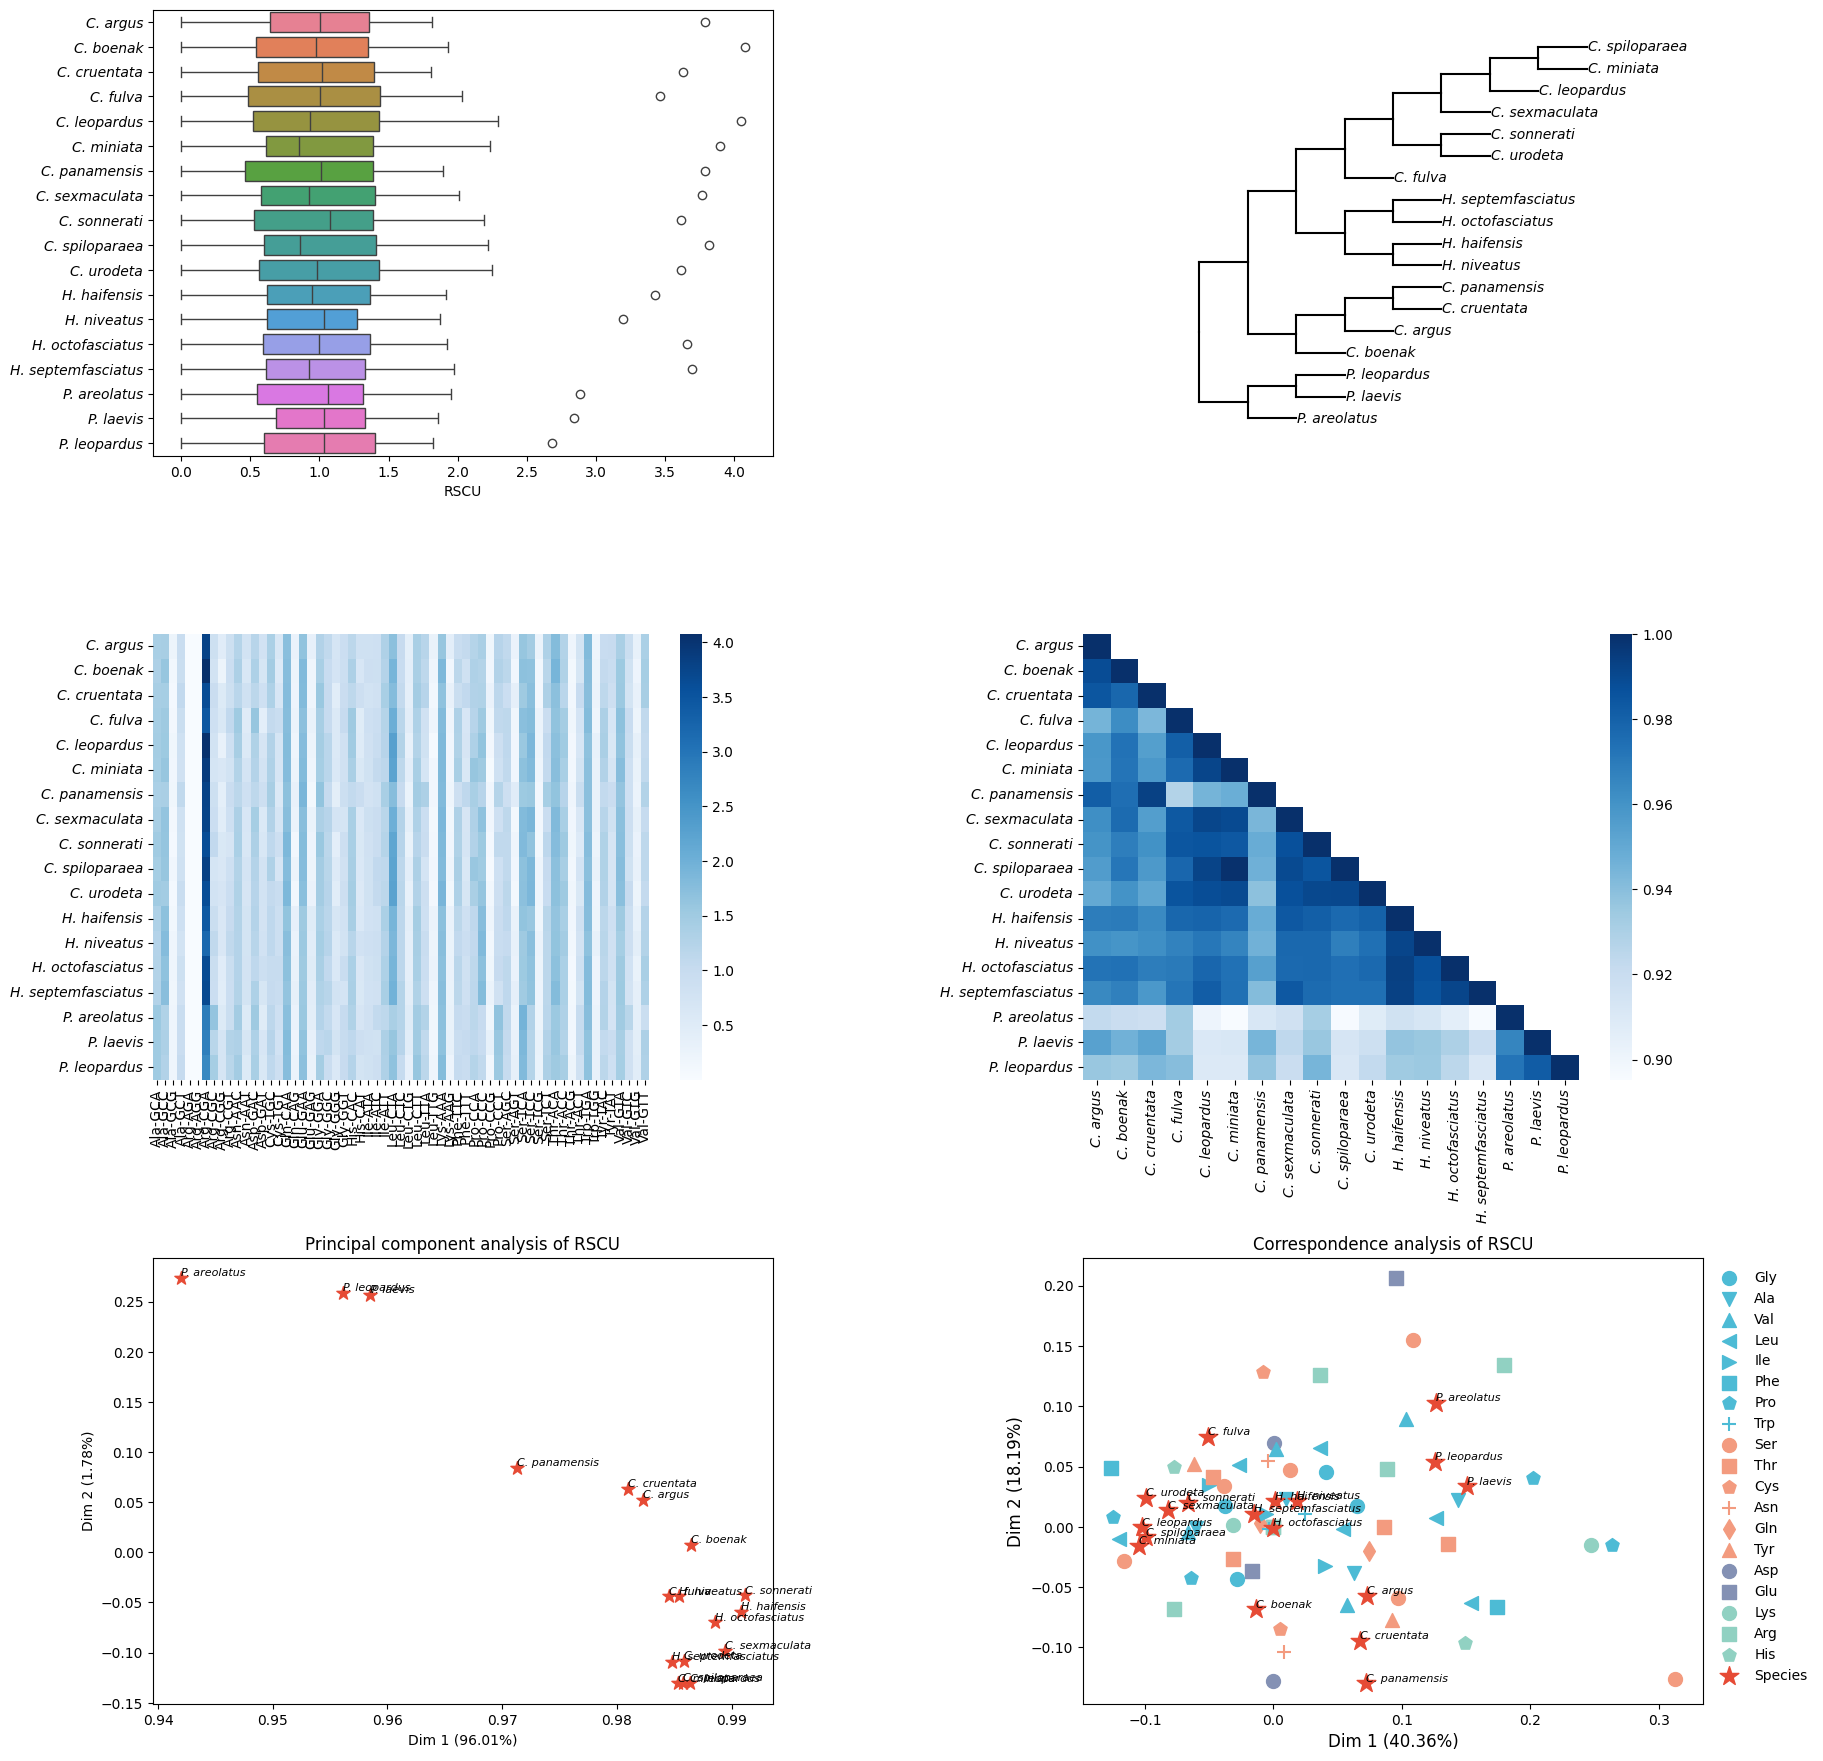

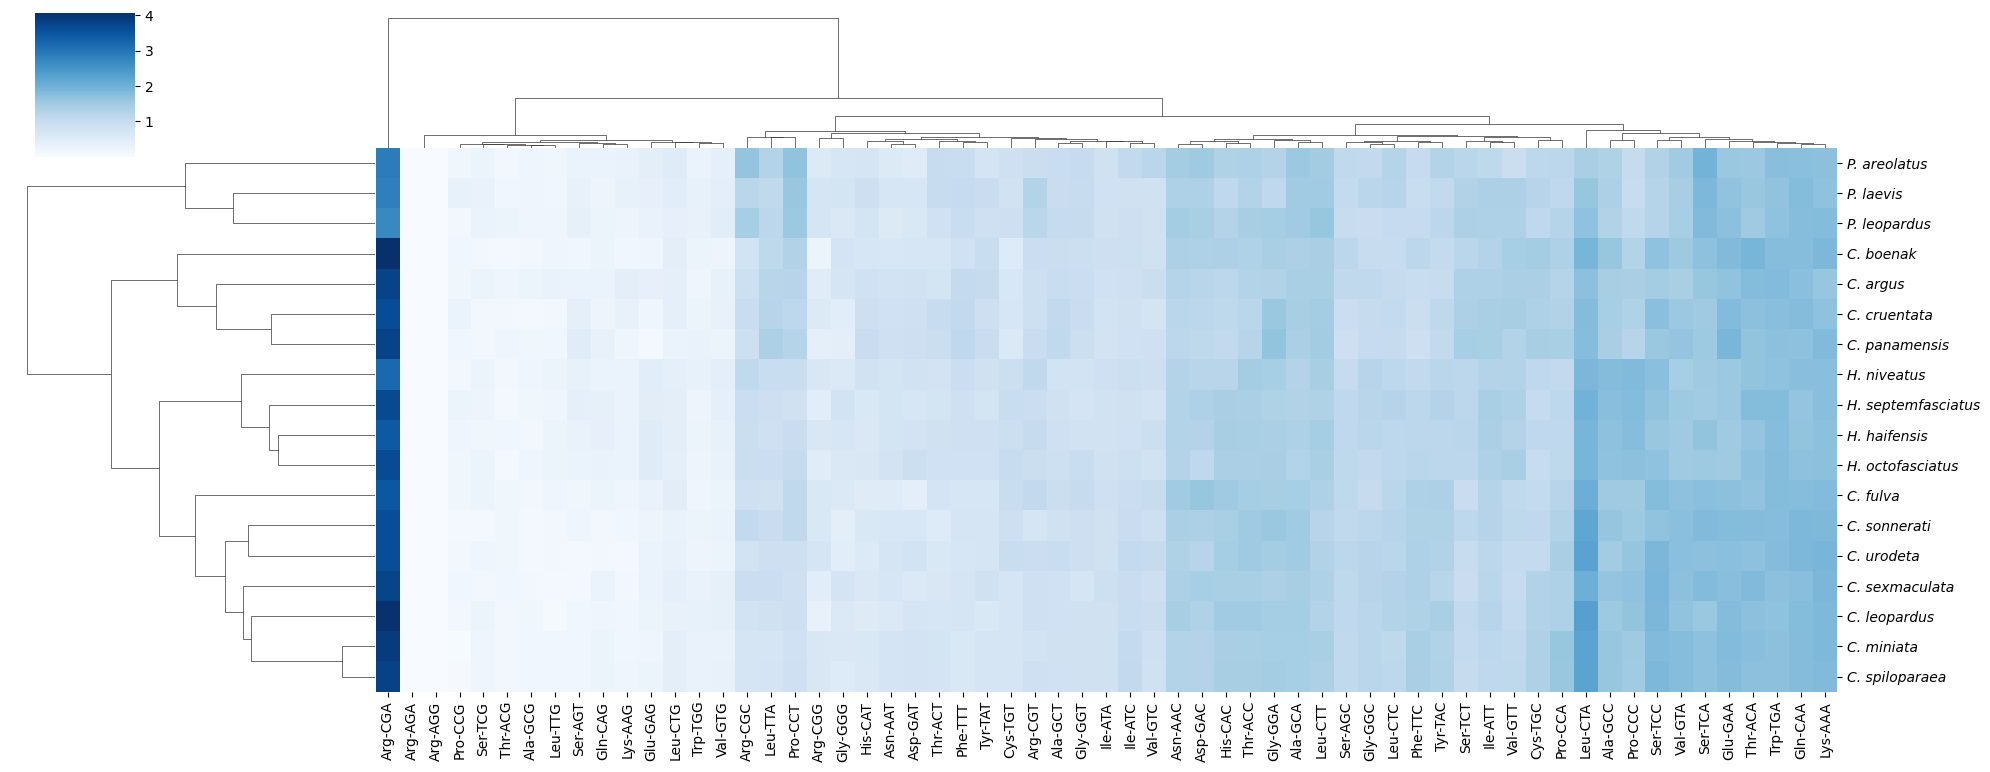

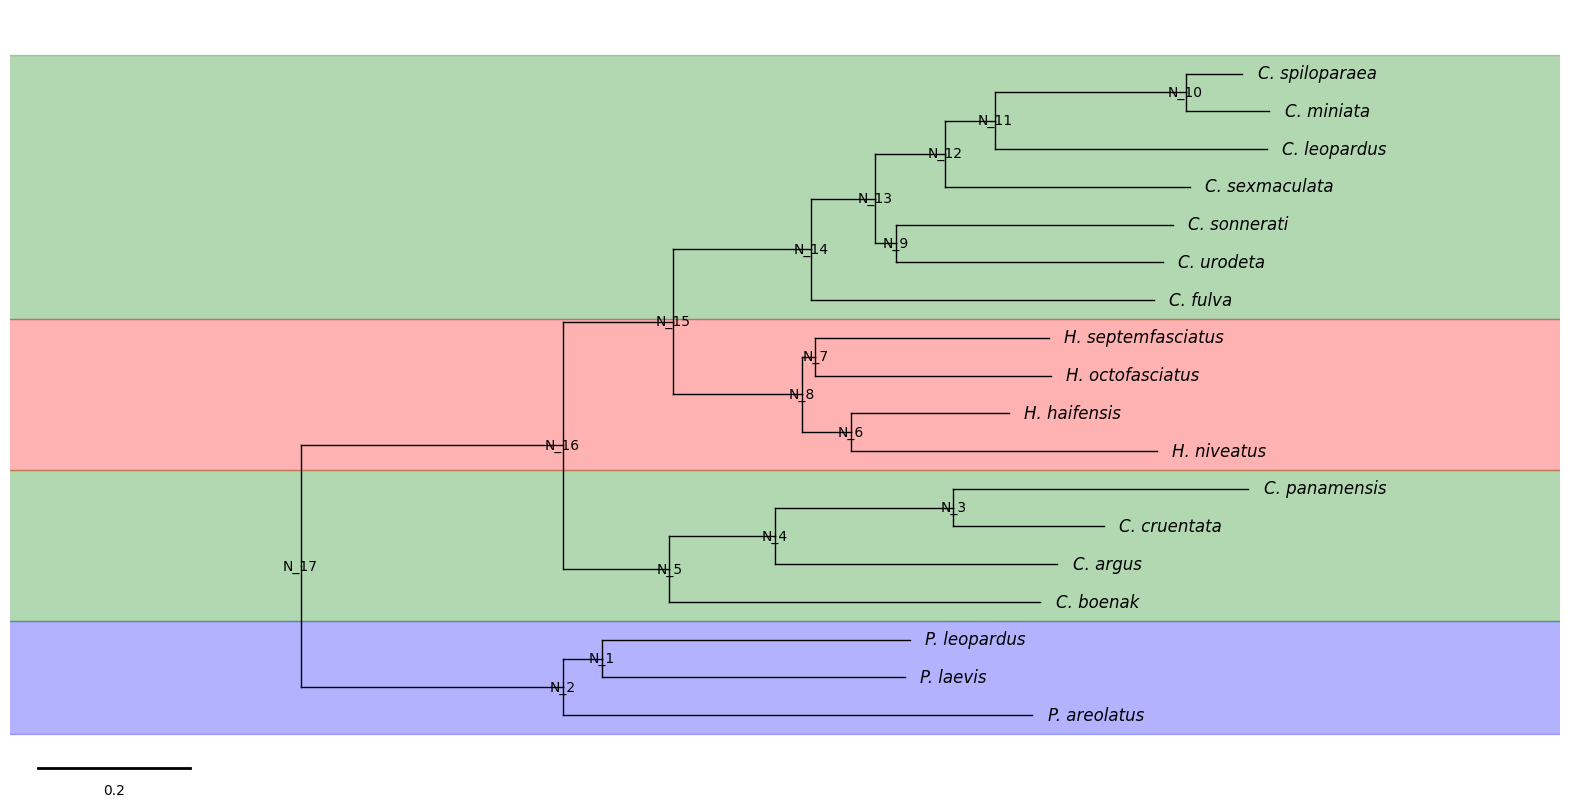

In [56]:
# Example 9: RSCU of multiple species analysis.

RSCU_Multiple_Species = pycubs.RSCU_Multiple_Species_Analysis(data=data, genetic_code=4)
fig, axs = plt.subplots(3,2, figsize=(20,22))
plt.subplots_adjust(hspace=0.4,wspace=0.5)

RSCU_Multiple_Species.draw_boxplot(ax=axs[0][0])
RSCU_Multiple_Species.draw_tree_plot(ax=axs[0][1],
                                     outgroup=["P. areolatus", "P. laevis", "P. leopardus"],
                                     tree_method='nj') # Draw a species tree based on RSCU and use the NJ method,
                                                       # and rerooted.
RSCU_Multiple_Species.draw_heatmap(ax=axs[1][0])
RSCU_Multiple_Species.draw_pearson_heatmap(ax=axs[1][1])
RSCU_Multiple_Species.draw_PCA_plot(ax=axs[2][0])
RSCU_Multiple_Species.draw_COA_plot(ax=axs[2][1], show_codon_labels=False)
RSCU_Multiple_Species.draw_clustermap(figsize=(20,8))

# You can easily customize the visualization of the phylogenetic tree.
species_tree =  RSCU_Multiple_Species.get_tree(outgroup=["P. areolatus", "P. laevis", "P. leopardus"],
                               tree_method='nj')
Species_Tree_Plotter =  pycubs.TreePlotter(species_tree, innode_label_size=10, ignore_branch_length=False)
Species_Tree_Plotter.add_scale_bar(length=0.2, label='0.2', position=(0.1, 0))
Species_Tree_Plotter.highlight_clade(node_names=["N_2"], color='blue', alpha=0.3)
Species_Tree_Plotter.highlight_clade(node_names=["N_5"], color='green', alpha=0.3)
Species_Tree_Plotter.highlight_clade(node_names=["N_14"], color='green', alpha=0.3)
Species_Tree_Plotter.highlight_clade(node_names=["N_8"], color='red', alpha=0.3)
Species_Tree_Plotter.plot(figsize=(20,10))

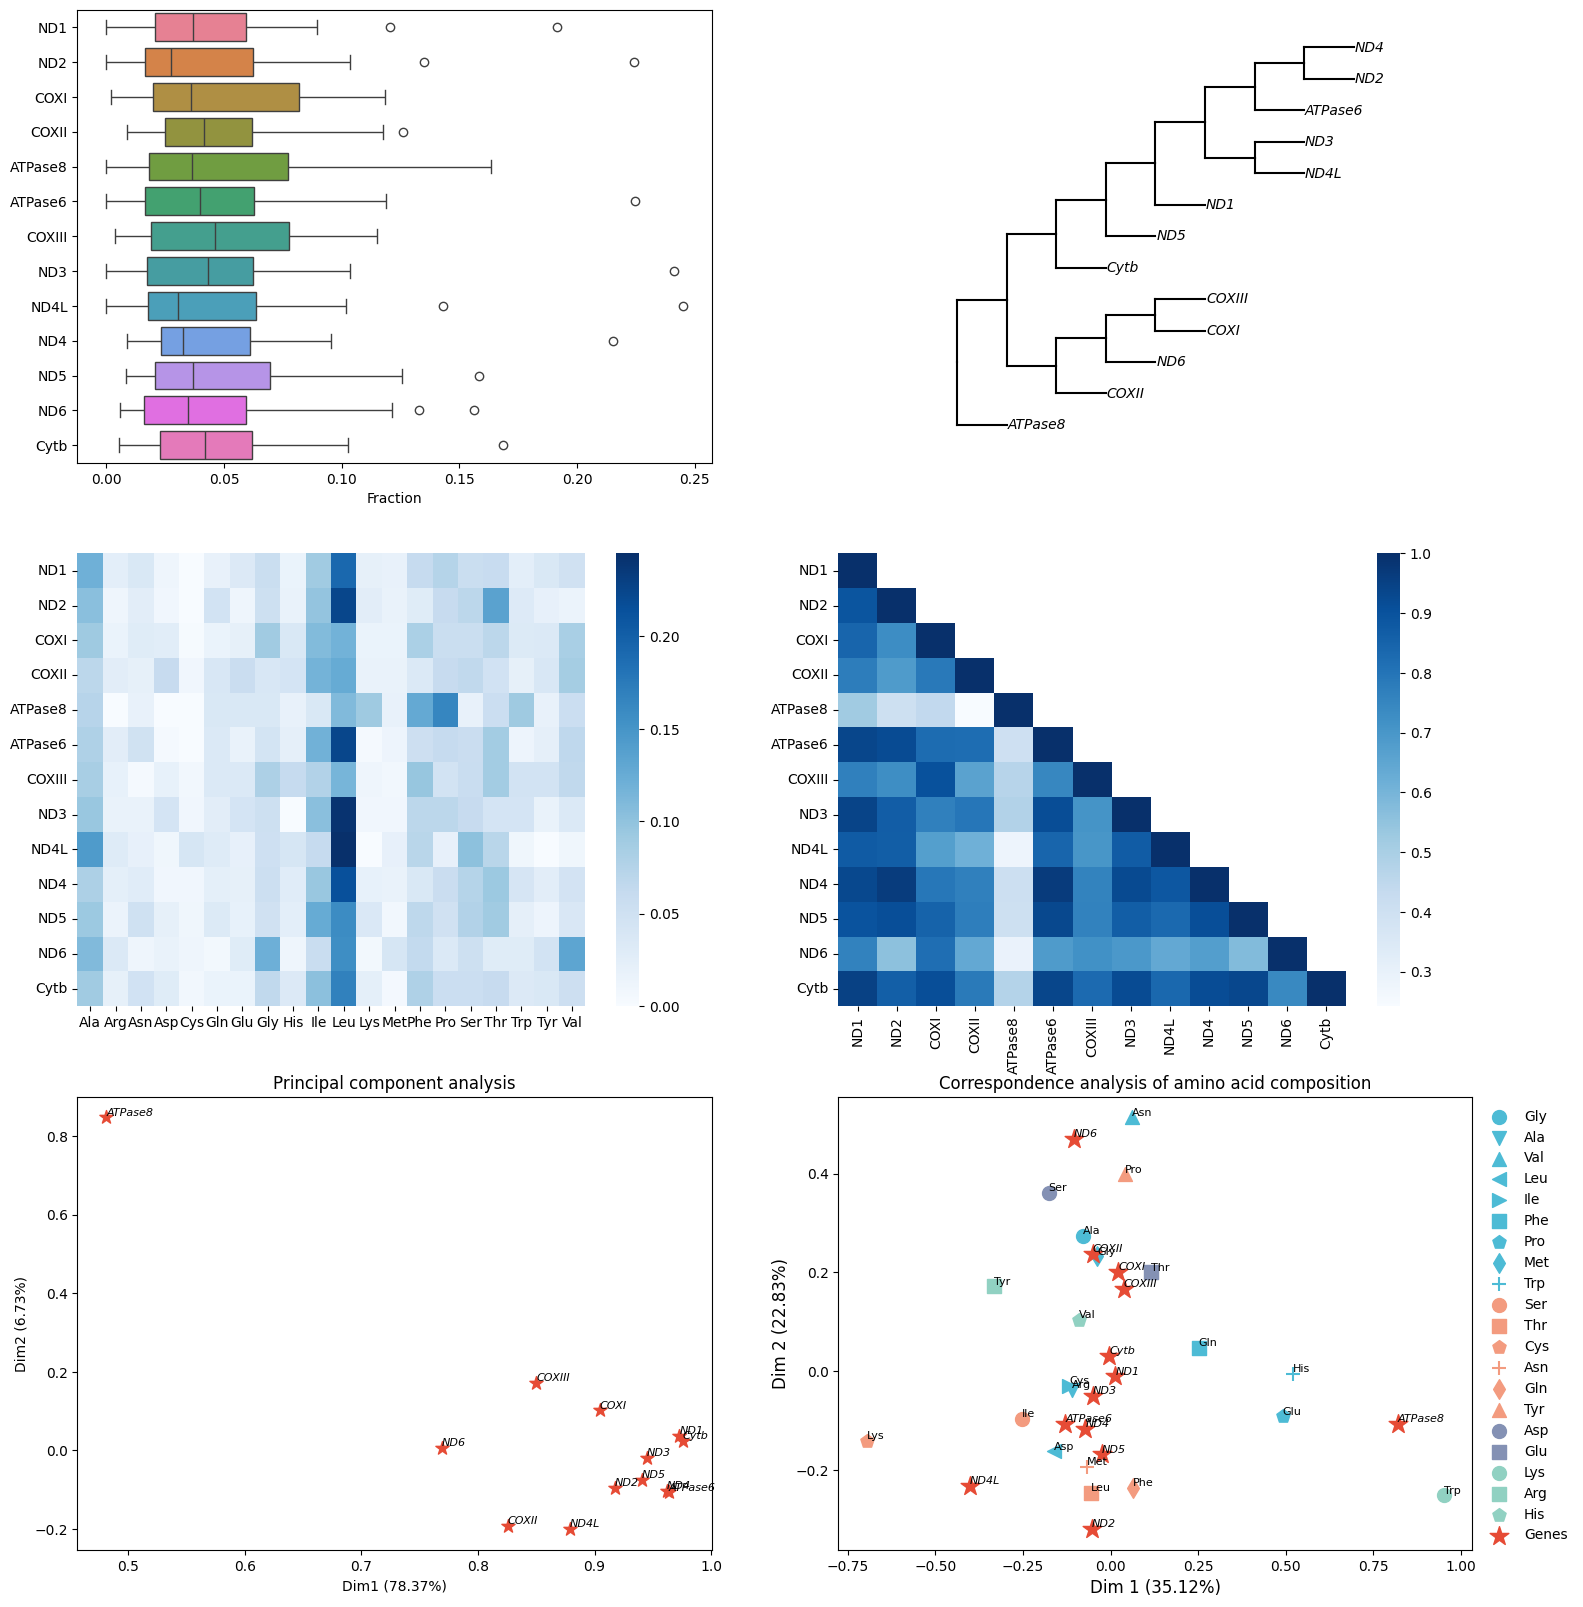

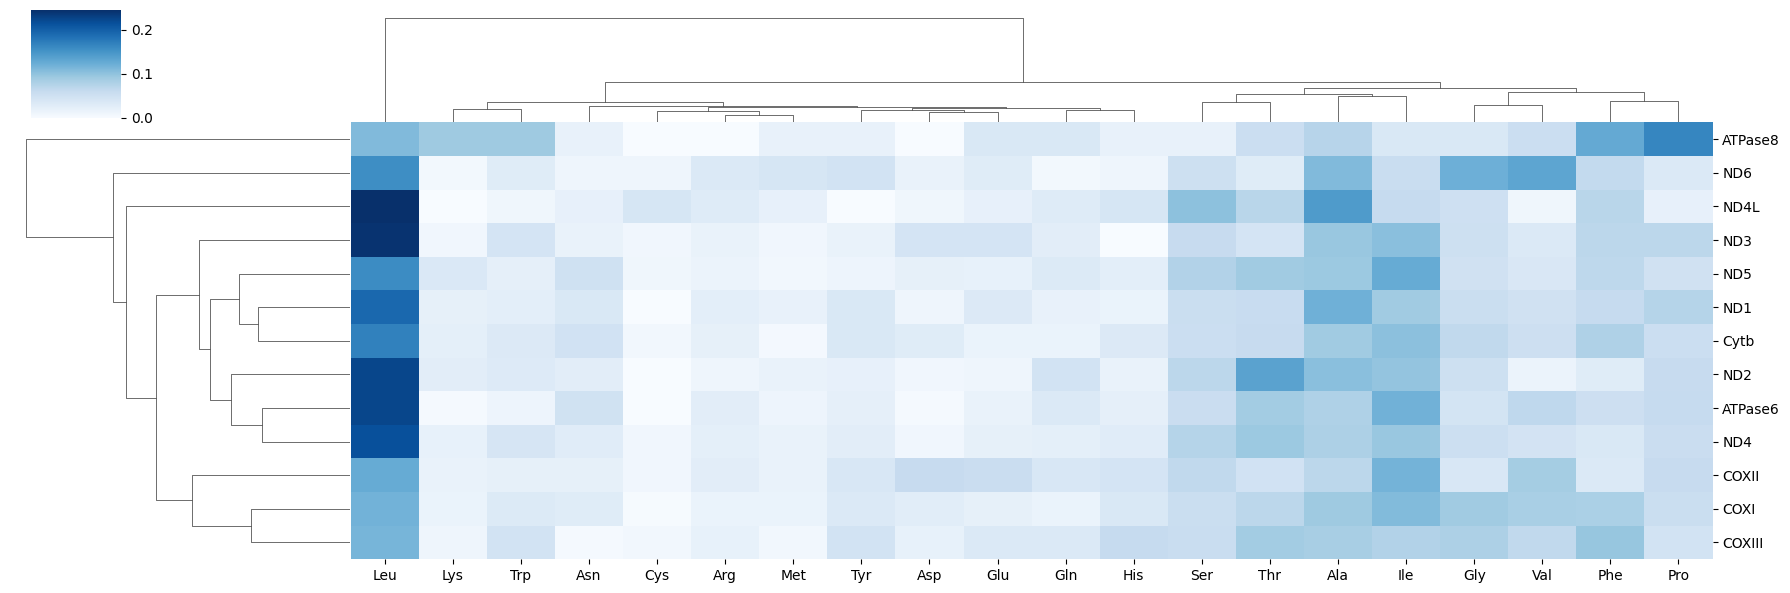

In [57]:
# Example 10: Analysis of the amino acid composition of each gene in a single species.

AA_Composition_Single_Species = pycubs.AA_Composition_Single_Species_Analysis(file=data[0][1], genetic_code=4)

fig, axs = plt.subplots(3,2, figsize=(18,20))
plt.subplots_adjust(hspace=0.2)

AA_Composition_Single_Species.draw_boxplot(ax=axs[0][0])
AA_Composition_Single_Species.draw_tree_plot(ax=axs[0][1])
#AA_Composition_Single_Species.draw_boxplot(ax=axs[0][1], dtype="Count") # We don't recommend using "Count".
AA_Composition_Single_Species.draw_heatmap(ax=axs[1][0])
AA_Composition_Single_Species.draw_pearson_heatmap(ax=axs[1][1])
AA_Composition_Single_Species.draw_PCA_plot(ax=axs[2][0])
AA_Composition_Single_Species.draw_COA_plot(ax=axs[2][1])

AA_Composition_Single_Species.draw_clustermap(figsize=(18,6))

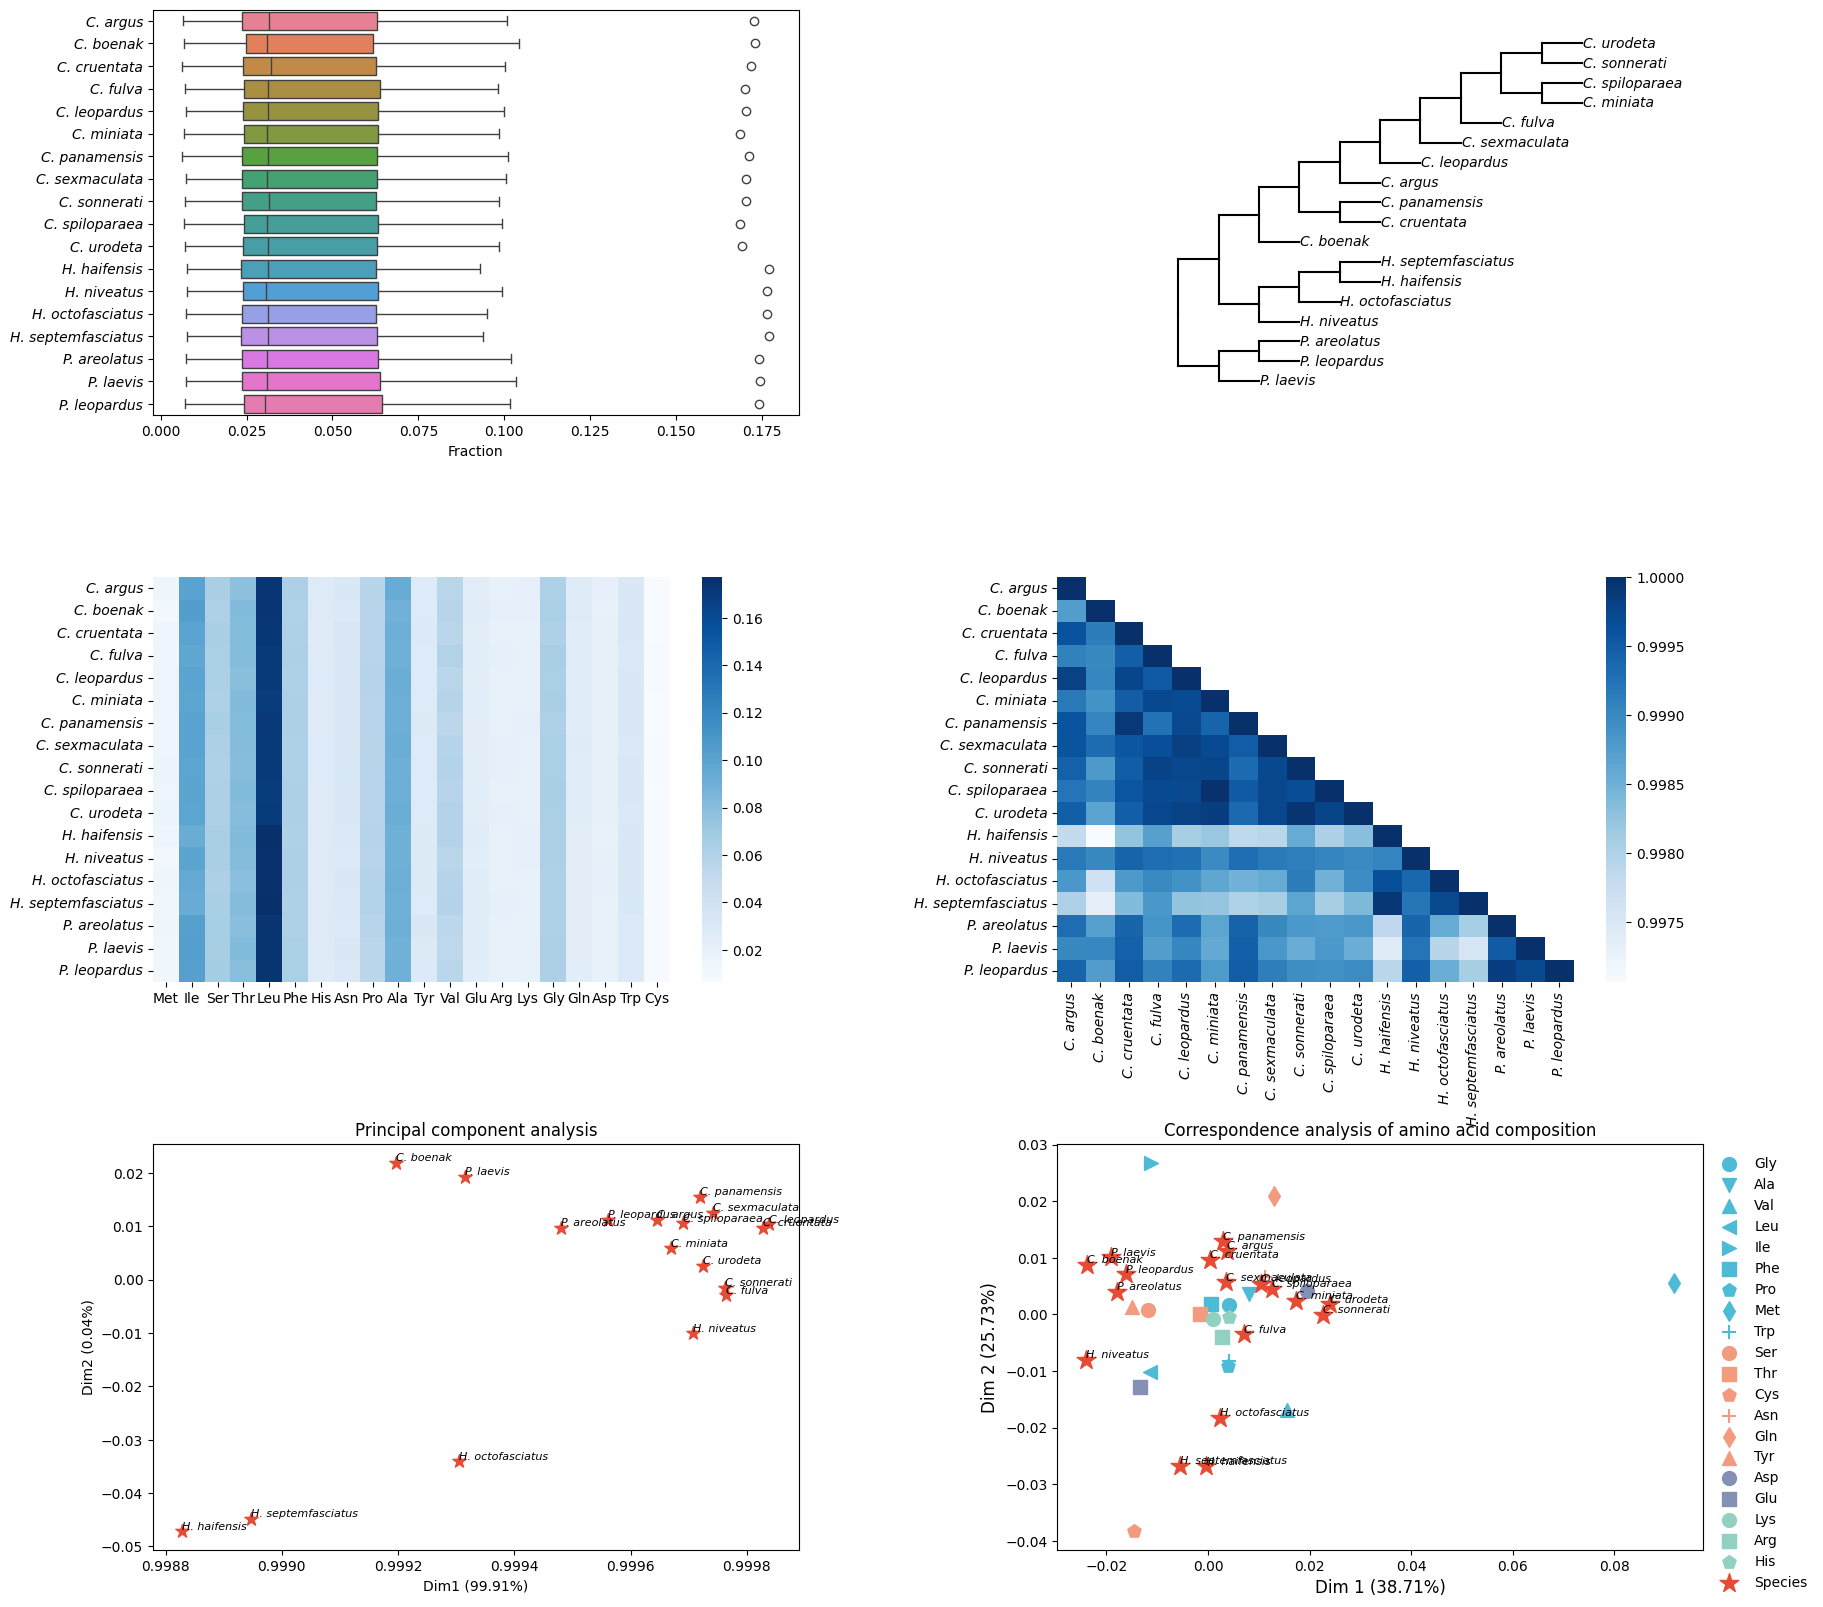

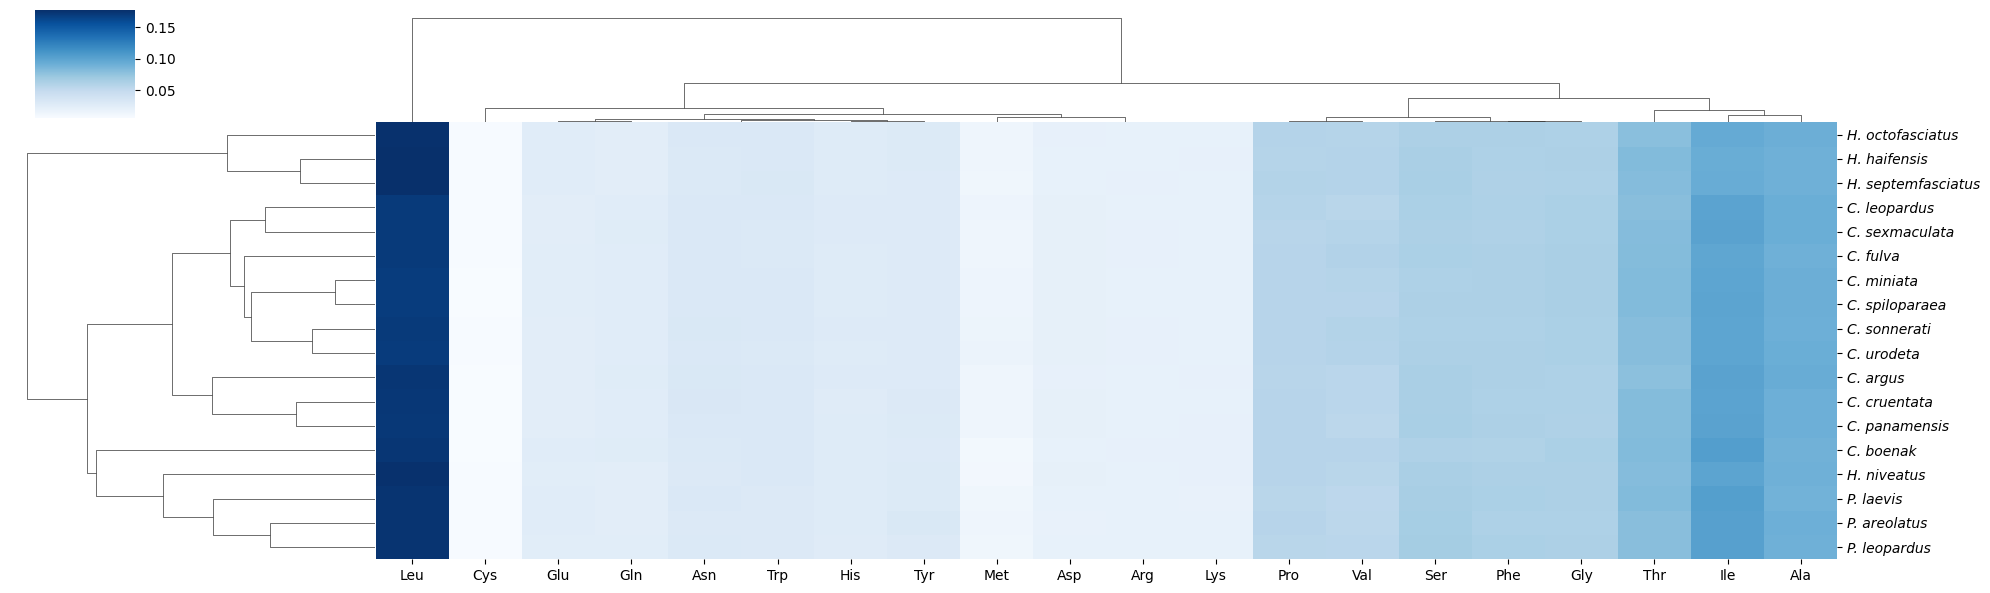

In [58]:
# Example 11: Multiple species analysis of the amino acid composition.

AA_Composition_Multiple_Species = pycubs.AA_Composition_Multiple_Species_Analysis(data=data, genetic_code=4)
fig, axs = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.4,wspace=0.4)

AA_Composition_Multiple_Species.draw_boxplot(ax=axs[0][0])
AA_Composition_Multiple_Species.draw_tree_plot(ax=axs[0][1], outgroup=["P. areolatus", "P. laevis", "P. leopardus"])
AA_Composition_Multiple_Species.draw_heatmap(ax=axs[1][0])
AA_Composition_Multiple_Species.draw_pearson_heatmap(ax=axs[1][1])
AA_Composition_Multiple_Species.draw_PCA_plot(ax=axs[2][0])
AA_Composition_Multiple_Species.draw_COA_plot(ax=axs[2][1], show_amino_acid_labels=False)
AA_Composition_Multiple_Species.draw_clustermap(figsize=(20,6))

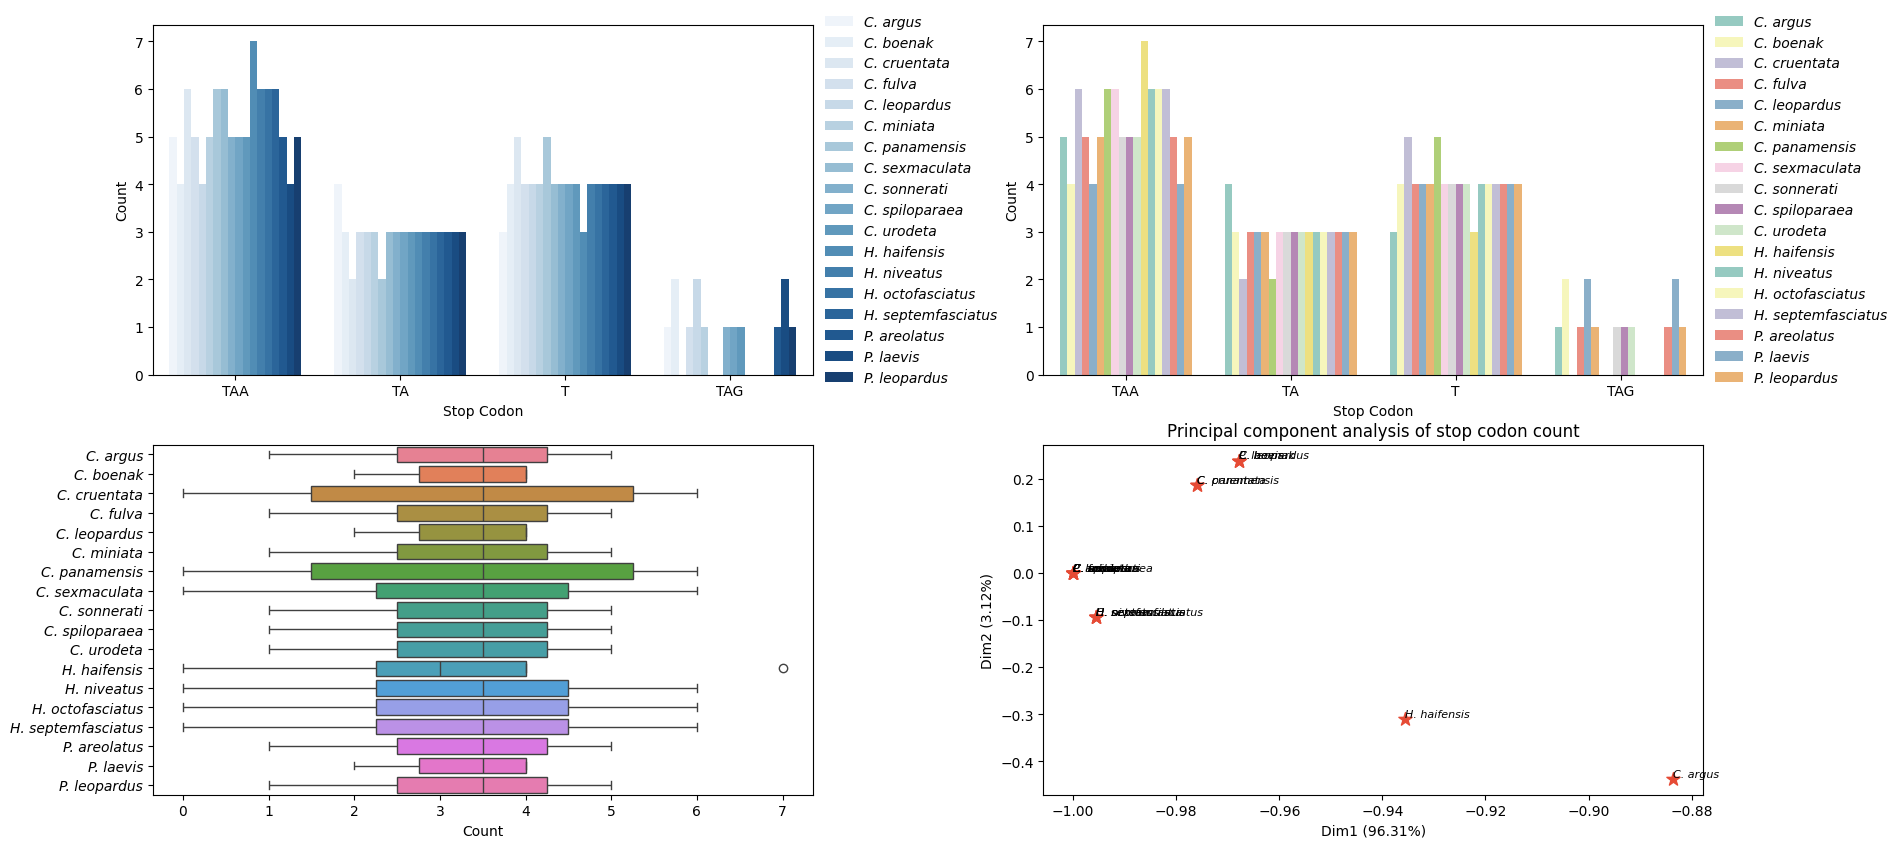

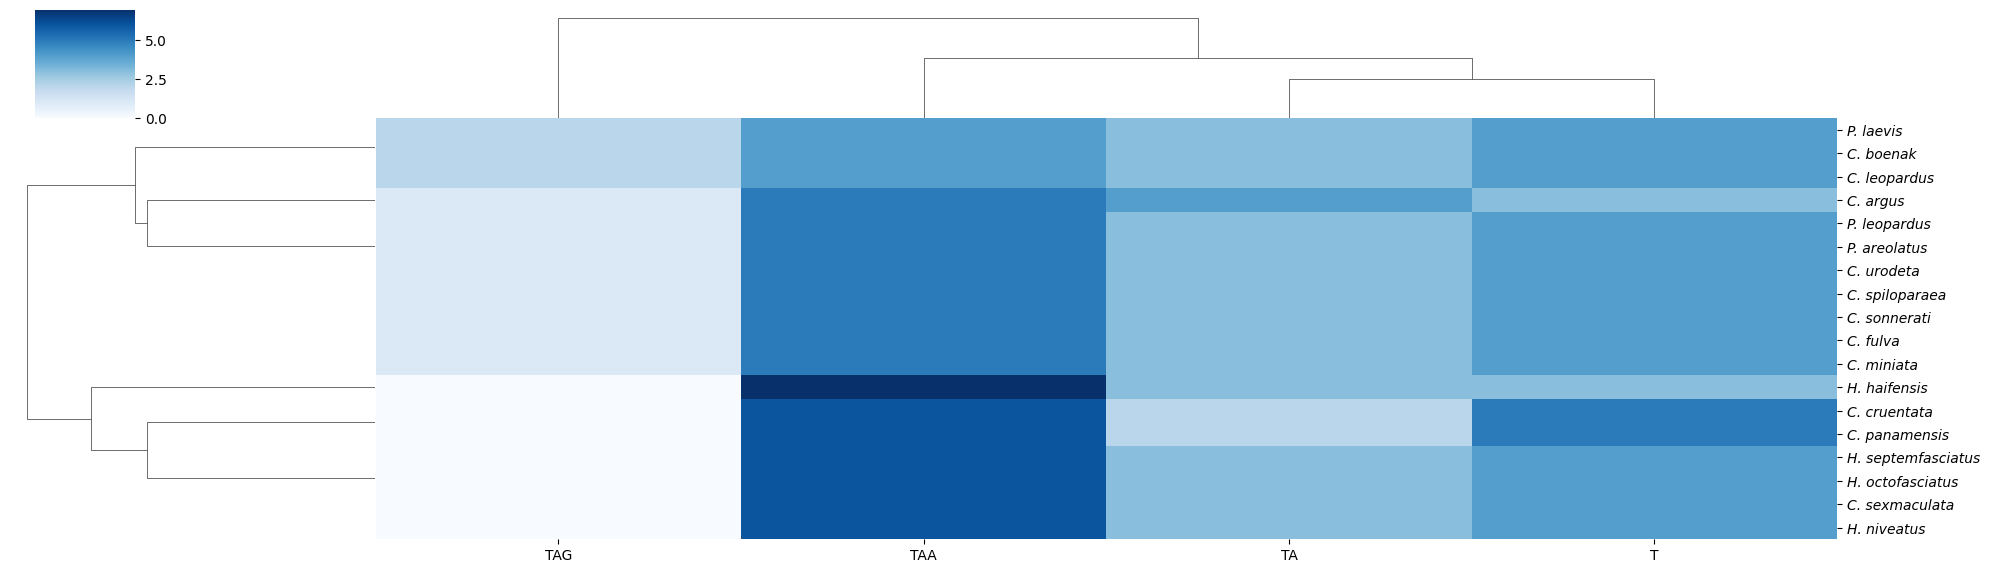

In [59]:
# Example 12: Stop codon analysis of multiple species.

Stop_Codon = pycubs.Stop_Codon_Analysis(data=data, incomplete_codon=True, genetic_code=4)

fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.subplots_adjust(wspace=0.35)

Stop_Codon.draw_barplot(ax=axs[0][0])
Stop_Codon.draw_barplot(ax=axs[0][1], palette="Set3") # change color
Stop_Codon.draw_boxplot(ax=axs[1][0])
Stop_Codon.draw_PCA_plot(ax=axs[1][1])
Stop_Codon.draw_clustermap(figsize=(20,6))

All indices:  ['A', 'T', 'G', 'C', 'GC', 'AT', 'GC-skew', 'AT-skew', 'A1', 'T1', 'G1', 'C1', 'GC1', 'AT1', 'GC1-skew', 'AT1-skew', 'A2', 'T2', 'G2', 'C2', 'GC2', 'AT2', 'GC2-skew', 'AT2-skew', 'A3', 'T3', 'G3', 'C3', 'GC3', 'AT3', 'GC3-skew', 'AT3-skew', 'GC12', 'A1s', 'T1s', 'G1s', 'C1s', 'GC1s', 'AT1s', 'A2s', 'T2s', 'G2s', 'C2s', 'GC2s', 'AT2s', 'A3s', 'T3s', 'G3s', 'C3s', 'GC3s', 'AT3s', 'GC12s', 'A3s codonW', 'T3s codonW', 'G3s codonW', 'C3s codonW', 'L_sym', 'L_aa', 'Aromaticity', 'Hydropathicity', 'ENC', 'CAI', 'CBI', 'Fop']


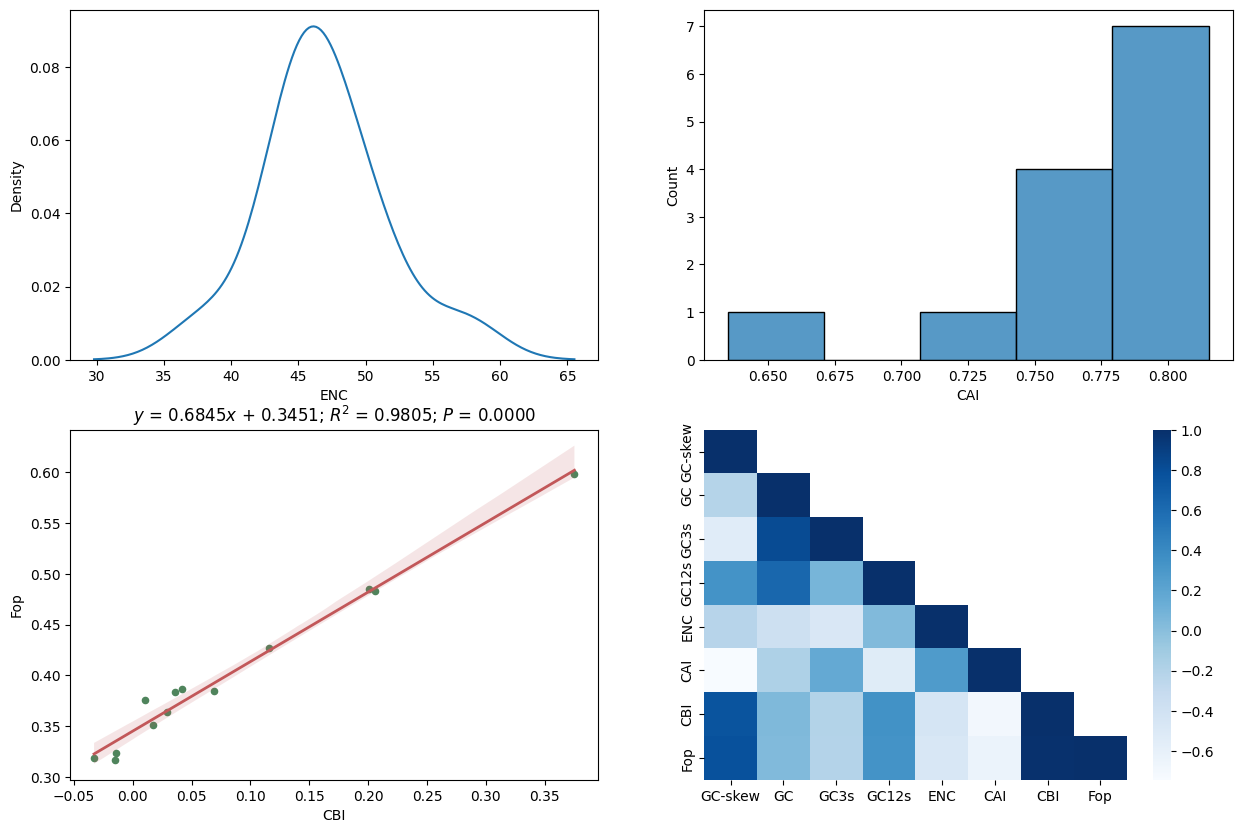

In [60]:
# Example 13: Seqence analysis of various indicators, such as GC3s, ENC, CAI, CBI, Fop, GC, etc.

optimal_codons = pycubs.get_optimal_codons_from_ENC(file=data[0][1]) # Identify the optimal codons, based on ENC.
ref_Obs = pycubs.get_Obs(data[0][1], genetic_code=4) # Use the protein coding sequence of the entire mitochondrion 
                                                     # of C. argus to calculate the reference Obs, which is used as 
                                                     # a reference for CAI calculation.

Sequence_Indices = pycubs.Sequence_Indices_Analysis(file=data[0][1],
                                                    genetic_code=4, 
                                                    optimal_codons=optimal_codons,
                                                    cai_ref_Obs=ref_Obs)
print("All indices: ",Sequence_Indices.indices_df.columns.tolist())

fig, axs = plt.subplots(2,2,figsize=(15,10))
Sequence_Indices.draw_density_plot(x_axis="ENC", ax=axs[0][0])
Sequence_Indices.draw_histogram_plot(x_axis="CAI", ax=axs[0][1])
Sequence_Indices.draw_regression_plot(x_axis="CBI", y_axis="Fop", ax=axs[1][0])
Sequence_Indices.draw_pearson_heatmap(indices=["GC-skew","GC", "GC3s", "GC12s", "ENC", "CAI", "CBI", "Fop"], ax=axs[1][1])